In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the csv's 

In [2]:
df = pd.read_csv(r'C:\Users\hp\Documents\datascs6thsem\projectofESSEdatascs\BBC_news_classify\csv_files\BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
test = pd.read_csv(r'C:\Users\hp\Documents\datascs6thsem\projectofESSEdatascs\BBC_news_classify\csv_files\BBC News Test.csv')
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


# work on df

In [4]:
df.shape

(1490, 3)

In [5]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
df.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:>

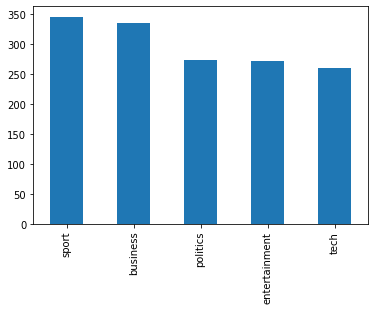

In [7]:
df.Category.value_counts().plot(kind='bar')

# functions used to clean the data

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# tokenize the text
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

#remove stopwords from tokens list
def remove(tokens):
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# lemmatize the text
from nltk.stem import WordNetLemmatizer
def lemma(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas


# combine function for preprocessing
def preprocess(doc):
    lis=[]
    for text in doc.split("."):
        text = text.lower()
        tokens = tokenize(text)
        tokens = remove(tokens)
        tokens = lemma(tokens)
        lis+=tokens
    return lis


# apply doc 2 vec model

In [9]:
# import doc2vec from gensim
import gensim

first we will produce list of tagged words required for training and converting to doc2vec 

In [10]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

this is doc 2 vec function for dataframe as parameter
first preprocess the text column
apply model and build vocab
now train the model and convert to 100 dimension vector

In [11]:
def doc2vec(df):
    df.Text = df.Text.apply(lambda x : preprocess(x))
    data_for_training = list(tagged_document(df.Text.array))
    model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=30)
    model.build_vocab(data_for_training)
    model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
    return model

train_vec is nothing but model we will use to create vectors

In [12]:
train_vec = doc2vec(df)

create new column vector and apply infer_vector method on text column

In [13]:
df['vector']=df.Text.apply(lambda x : train_vec.infer_vector(x))

In [14]:
df['len'] = df.Text.apply(lambda x : len(x))

<AxesSubplot:>

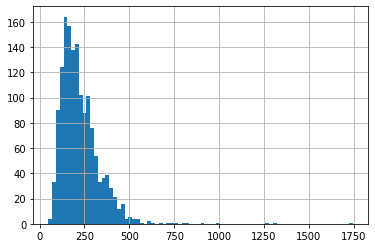

In [15]:
df.len.hist(bins = 80)

In [16]:
df.len.describe()

count    1490.000000
mean      226.610067
std       117.861954
min        49.000000
25%       150.000000
50%       204.000000
75%       277.000000
max      1745.000000
Name: len, dtype: float64

In [18]:
pg = pd.DataFrame(columns = [i for i in range(1,301)])
for i in range(0,len(df)):
    pg.loc[i] = df.vector[i]

In [19]:
pg

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,0.442643,0.363925,-0.123193,-0.851970,0.424297,-0.429207,0.390102,-0.426558,0.524087,-0.358373,...,-0.315840,-1.099400,0.040669,0.112844,-0.187954,0.726131,-0.190141,0.131473,-0.815885,-0.463699
1,0.733646,0.006645,-0.119438,-0.455147,-0.632707,-0.144557,0.408540,-0.149317,-0.102572,-0.358204,...,-0.430755,-0.154239,-0.239439,0.201693,-1.417984,0.807708,0.049391,0.493970,0.011066,0.459518
2,0.362695,0.611801,0.059171,0.662911,-1.673495,1.646478,-0.580741,-0.090479,0.539365,0.491676,...,0.240740,0.514142,-0.319775,-1.262645,-1.667941,-0.112945,0.509340,-0.099671,-0.713398,0.467509
3,0.646177,0.664113,-0.793178,-0.372059,-0.575049,1.316628,-0.242870,0.548207,0.563519,-0.008009,...,-0.608086,0.047497,-0.503396,-0.589623,-0.241728,0.418146,-0.906113,0.813844,0.141097,0.037557
4,0.225444,0.133187,0.201204,-0.675941,-0.800937,-0.508933,0.570423,-0.163420,0.859603,0.166987,...,0.512034,-0.753587,-0.806617,0.899999,-0.908612,0.285168,-1.803681,0.845383,-0.225151,-0.509025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.088140,-0.280584,-0.796685,-0.328544,-0.018129,-0.245281,0.250310,-0.012892,-0.000150,0.663669,...,-0.238670,0.077014,0.715189,-0.253366,-0.190978,0.743405,-0.472133,0.303265,-0.518185,0.160408
1486,1.521261,1.025879,-0.187394,0.315422,-0.603353,-0.277333,0.672799,-0.055385,1.461051,2.057647,...,0.009099,-0.742930,0.020870,0.074809,-1.074178,2.184097,-0.639203,-0.352968,0.153848,1.910450
1487,0.226514,0.607929,0.279368,-0.479770,0.337554,-0.542358,0.880003,-0.400336,0.204713,0.180942,...,-0.112596,-0.653039,-0.511422,-0.060716,-0.380081,0.583192,-0.653352,0.617037,0.361654,0.199289
1488,0.484679,0.588827,-0.366631,0.390100,-1.098548,-0.437739,0.516982,-0.001015,0.496793,1.218971,...,-0.023614,-0.551855,-0.011288,-0.464684,-0.029529,0.688782,-1.323764,0.490785,0.268007,0.512129


<AxesSubplot:>

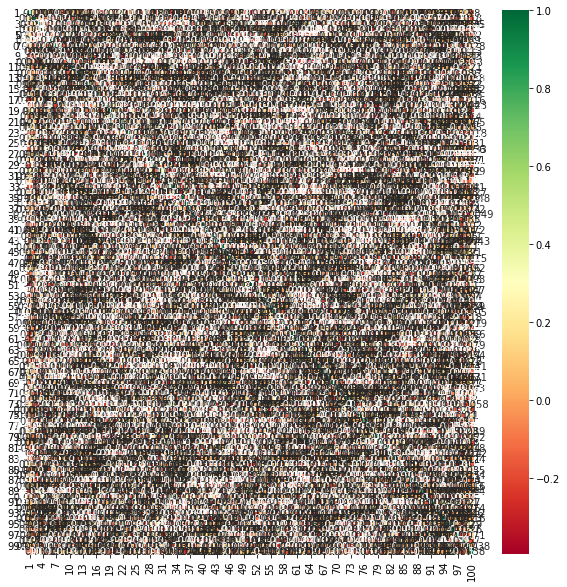

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pg.corr(),annot=True,cmap='RdYlGn')

C:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>],
       [<AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSubpl

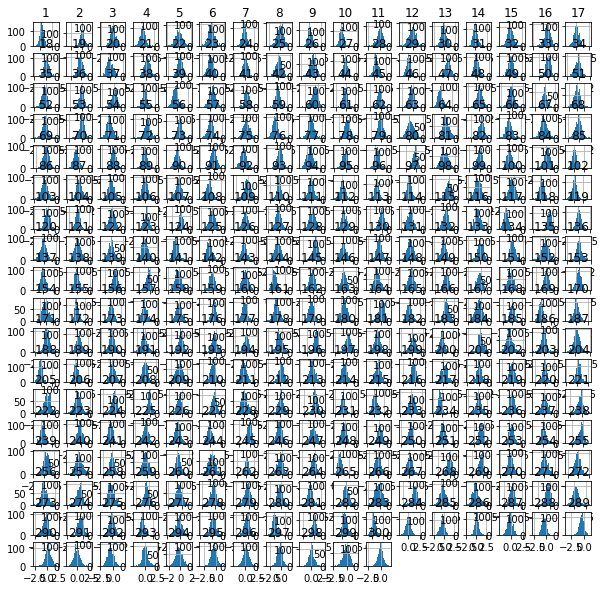

In [20]:

pg.hist(bins=50,figsize=(10,10))

repeat this for test dataframe 


In [21]:
test['vector']=test.Text.apply(lambda x : train_vec.infer_vector(preprocess(x)))

convert 'category' values into numbers by simple maping

In [22]:
def maping(x):
    dic = {'politics':1, 'business':2, 'tech':3, 'entertainment':4, 'sport':5}
    return dic[x]

In [23]:
y = df['Category'].apply(lambda x : maping(x))

In [24]:
df

,ArticleId,Text,Category,vector,len
0,1833,"[worldcom, ex-boss, launch, defence, lawyer, d...",business,"[0.44264323, 0.36392537, -0.1231931, -0.851969...",197
1,154,"[german, business, confidence, slide, german, ...",business,"[0.7336456, 0.006644789, -0.11943781, -0.45514...",211
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business,"[0.36269513, 0.6118013, 0.059171453, 0.6629114...",302
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech,"[0.6461765, 0.6641128, -0.79317796, -0.3720592...",360
4,917,"[enron, boss, $, 168m, payout, eighteen, forme...",business,"[0.22544442, 0.13318746, 0.2012042, -0.6759406...",225
...,...,...,...,...,...
1485,857,"[double, eviction, big, brother, model, capric...",entertainment,"[0.08813959, -0.2805842, -0.79668546, -0.32854...",127
1486,325,"[dj, double, act, revamp, chart, show, dj, duo...",entertainment,"[1.5212609, 1.0258788, -0.18739423, 0.31542176...",317
1487,1590,"[weak, dollar, hit, reuters, revenue, medium, ...",business,"[0.22651367, 0.60792893, 0.27936798, -0.479770...",162
1488,1587,"[apple, ipod, family, expands, market, apple, ...",tech,"[0.4846791, 0.58882713, -0.36663124, 0.3900998...",331


In [25]:
y

0       2
1       2
2       2
3       3
4       2
       ..
1485    4
1486    4
1487    2
1488    3
1489    3
Name: Category, Length: 1490, dtype: int64

# train and test model


In [27]:
# train the model random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=0)
rf.fit(list(df.vector.array), y)
y_pred1 = rf.predict(list(test.vector.array))


In [28]:
# logistic regression for multiclass
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression( )
logreg.fit(list(df.vector.array), y)
y_pred2 = logreg.predict(list(test.vector.array))

C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# mlp algorithm for multiclass
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(list(df.vector.array), y)
y_pred3 = mlp.predict(list(test.vector.array))

In [31]:
# knn algorithm for multiclass
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(list(df.vector.array), y)
y_pred5 = knn.predict(list(test.vector.array))


In [32]:
# svc algorithm for multiclass
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, gamma=0.1)
svc.fit(list(df.vector.array), y)
y_pred6 = svc.predict(list(test.vector.array))


In [33]:
# save y_pred in csv file
def to_csv(test,y_pred,file_name):
    pred = test.copy()
    pred['Category'] = y_pred

    dic = {1:'politics', 2:'business', 3:'tech', 4:'entertainment', 5:'sport'}
    pred['Category'] = pred['Category'].apply(lambda x : dic[x])
    pred.set_index('ArticleId', inplace=True)
    pred.drop( columns = ['Text','vector'], axis=1, inplace=True)
    pred.to_csv('{}.csv'.format(file_name))


In [34]:
to_csv(test,y_pred1,'rf_size_300.csv')
to_csv(test,y_pred2,'logreg_size_300.csv')
to_csv(test,y_pred3,'mlp_size_300.csv')
to_csv(test,y_pred5,'knn_size_300.csv')
to_csv(test,y_pred6,'svc_size_300.csv')

by taking different sizes for vector like 50 ,100, 200, 300 It is noticed that only 2 algos are consistent here mlp 
and random forest out of which mlp has given better result so we will save model mlp in .pickle and use it for deployment
of app

# save model to pickle

In [35]:
# save to pickle
import pickle 
with open(r'C:\Users\hp\Documents\datascs6thsem\projectofESSEdatascs\BBC_news_classify\endproject\trained_model.pickle', 'wb') as handle:
    pickle.dump(train_vec,handle)

with open(r'C:\Users\hp\Documents\datascs6thsem\projectofESSEdatascs\BBC_news_classify\endproject\model.pickle', 'wb') as handle:
    pickle.dump(mlp,handle)
